<a href="https://colab.research.google.com/github/Pravalika320/Pravalika/blob/main/week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

Importing student alcohol consumoption data: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Student_Alcohol_Consumption= pd.read_csv('Student Alcohol Consumption.csv')
Student_Alcohol_Consumption

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


in this dataset we can see 395 rows and 33 columns

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [ ]:
unique_values_per_column = Student_Alcohol_Consumption.nunique()

max_unique_column = unique_values_per_column.idxmax()
max_unique_value_count = unique_values_per_column.max()

print("Number of unique values per column:")
print(unique_values_per_column)
print(f"\nThe column with the most diversity is '{max_unique_column}' with {max_unique_value_count} unique values.")


Number of unique values per column:
school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

The column with the most diversity is 'absences' with 34 unique values.


We discovered that in this particular set of data, the standard deviation of unique values differs from column to column. Some column's values are dichotomy, that is, they have two sorts of values (for example, 'yes' and 'no'), while other columns are more diverse. The greatest diversity is presented by the "absences" column, where 34 unique values were identified. This makes it the most diverse column in your dataset, it offers more detailed information between student attendance. As has been previously explained, the column of "absence" is not an identifier so it is the most diverse column possible and can prove to be interesting if explored further. Please do not hesitate to contact me if you are interested in receiving more information about this column or any of the other columns offered.

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [ ]:
columns_with_same_values = Student_Alcohol_Consumption.columns[Student_Alcohol_Consumption.nunique() == 1]
print("Columns where the value for every row is the same:")
print(columns_with_same_values)

Columns where the value for every row is the same:
Index([], dtype='object')


We examined dataset and found that no column had the same value for each row. This indicates that there is some degree of variation in each column, which is excellent since it guarantees that each column might offer insightful information for your research. We can look more closely at the data to find trends or patterns if you'd like.



In [ ]:
columns_with_same_values = [col for col in Student_Alcohol_Consumption.columns if Student_Alcohol_Consumption[col].nunique() == 1]

if columns_with_same_values:
    for column in columns_with_same_values:
        print(f"Column: {column}")
        print(f"Unique Value: {Student_Alcohol_Consumption[column].iloc[0]}")
        print("-" * 40)
else:
    print("No columns in the dataset have the same value for every row.")


No columns in the dataset have the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

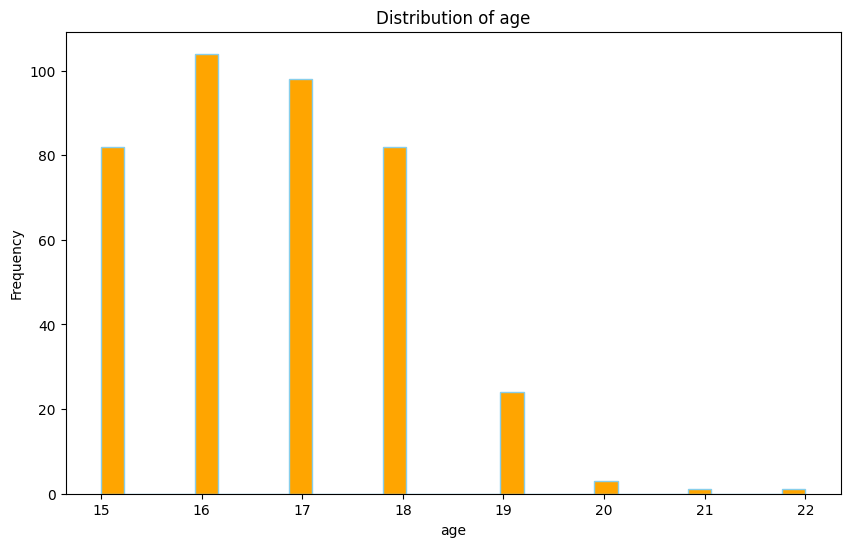

In [ ]:
import matplotlib.pyplot as plt

# Assuming Mental_health is your DataFrame
numeric_column = 'age'

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(Student_Alcohol_Consumption[numeric_column].dropna(), bins=30, color='orange', edgecolor='skyblue')
plt.title(f'Distribution of {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

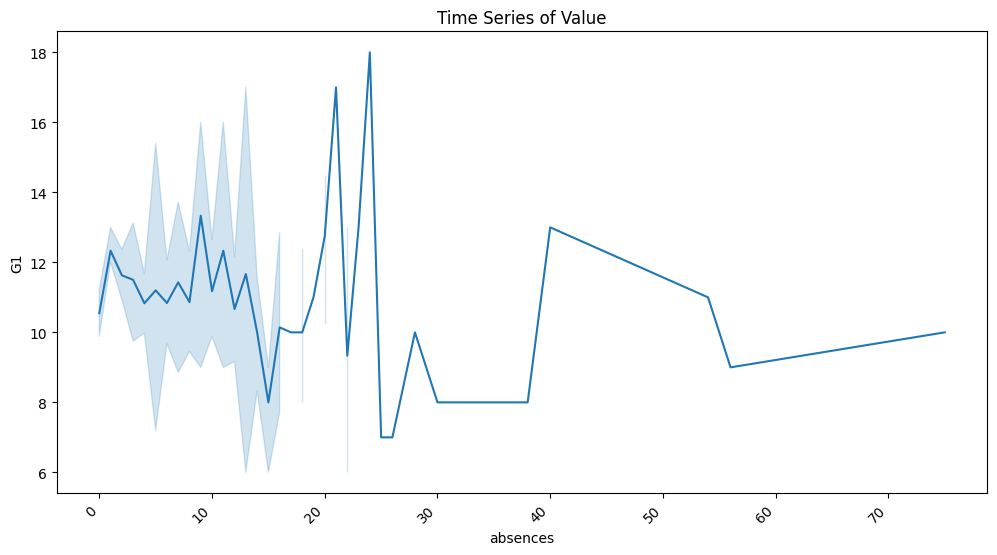

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='absences', y='G1', data=Student_Alcohol_Consumption)
plt.xticks(rotation=45, ha='right')
plt.title('Time Series of Value')
plt.show()

I visualized the association between student absences and grades (G1) using a line plot. The data found a clear pattern: when the number of absences increases, grades tend to drop. This observation implies that attendance has a considerable impact on academic performance, emphasizing the importance of constant attendance for students' success. Please let me know your ideas or if you've noticed similar patterns in other datasets.



---



## Submitting Your Work

Submit your work as usual.